# LAB Sheet-07: Linear Regression

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt

### Part 1.
This is a simple linear regression exercise, which is to be solved by least squares technique.
Using the data provided, the best straight line fitting the data points is to be evaluated. i.e find the coefficients $b_{0}, b_{1}$ of the line $y = b_{0}+b_{1}x$. 

(a)	Read the [Sweden auto insurance data set](https://www.kaggle.com/datasets/sunmarkil/auto-insurance-in-sweden-small-dataset), split it into training and testing sets.

In [60]:
filer = open(r'insurance.csv', 'r')
reader = csv.reader(filer)

data,x,y = [],[],[]

for row in reader:
    if (len(row)==2):
        row = [float(r) for r in row]
        data.append(row)
        x.append(row[0])
        y.append(row[1])
        

filer.close()


In [26]:
# Your code solution here
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)


(b)	Using the training set Compute the mean and variance of each variable (i.e. x and y)

In [28]:
# Your code solution here
x_train_mean = np.mean(x_train)
y_train_mean = np.mean(y_train)
x_train_var = np.var(x_train)
y_train_var = np.var(y_train)


print(f'Mean of Number of claims: {x_train_mean}')
print(f'Mean of Total payment settled(in 1000 swedish kronor): {y_train_mean}')
print(f'Variance of Number of claims : {x_train_var}')
print(f'Variance of Total payment settled(in 1000 swedish kronor) : {y_train_var}')

Mean of Number of claims: 24.7
Mean of Total payment settled(in 1000 swedish kronor): 100.59
Variance of Number of claims : 621.6899999999999
Variance of Total payment settled(in 1000 swedish kronor) : 8410.646499999999


(c)	Compute the covariance between the two variables (i.e Cov(x,y))

In [30]:
# Your code solution here
covar = np.cov(x_train,y_train)
covar = covar[0,1]
print(covar)

2150.068367346939


(d) Find the coefficients of the best fitting straight line.The coefficients are given by following formulae
$b_{1} = \frac{Cov(x,y)}{var(x)}$ ,
$b_{0} = mean(y)-b_{1} mean(x)$.


In [31]:
# Your code solution here
b1 = covar/x_train_var
b0 = y_train_mean - b1*(x_train_mean)
print(f'{b1 = }')
print(f'{b0 = }')


b1 = 3.4584252076548427
b0 = 15.166897370925383


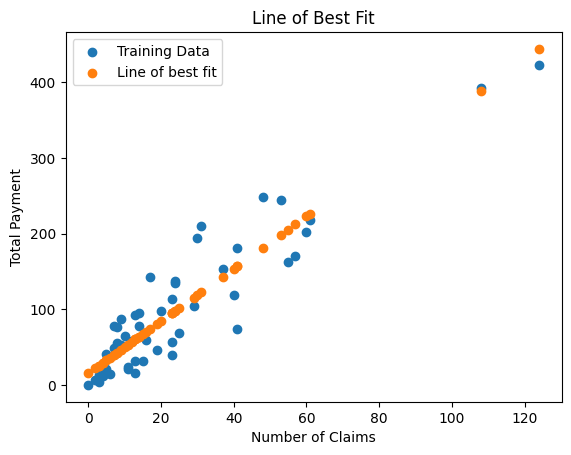

In [42]:
y_pred_train = []
for x_sample in x_train:
    tmp = b0 + b1*x_sample
    y_pred_train.append(tmp)

fig,ax = plt.subplots(1,1)

ax.scatter(x_train,y_train)
ax.scatter(x_train,y_pred_train)
ax.legend(['Training Data','Line of best fit'])
ax.set_xlabel('Number of Claims')
ax.set_ylabel('Total Payment')
ax.set_title('Line of Best Fit')
plt.show()

(e)	Perform the prediction on test data set using the regression solution and compute the root mean squared error between original data values and predicted values. 

In [38]:
# Your code solution here
y_pred = []
for x_sample in x_test:
    tmp = b0 + b1*x_sample
    y_pred.append(tmp)

sum = 0
for i in range(len(y_pred)):
    sum += (y_pred[i] - y_test[i])**2
rms_error = np.sqrt(sum/len(y_pred))
rms_error

35.262857810050164

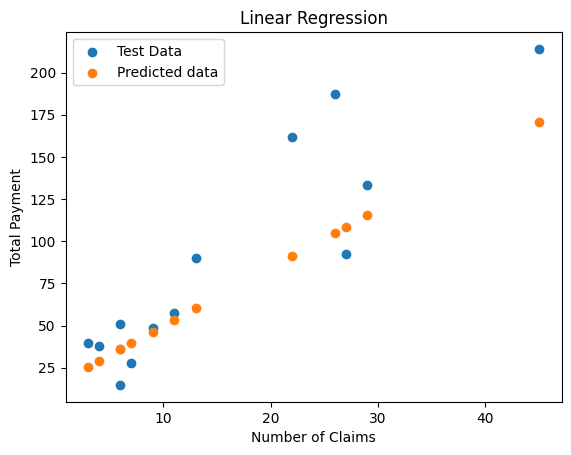

In [43]:
fig,ax = plt.subplots(1,1)

ax.scatter(x_test,y_test)
ax.scatter(x_test,y_pred)
ax.legend(['Test Data','Predicted data'])
ax.set_xlabel('Number of Claims')
ax.set_ylabel('Total Payment')
ax.set_title('Linear Regression')
plt.show()

### Part 2.
Solve the above problem(Part 1.) with linear algebra.
The idea is to form the overdetermined system of linear equations of the form $y = b_{0}+b_{1}x$.

The least squares solution for:
$X b = Y$
is given by 
$b = (X^{T}X)^{-1}X^{T}Y$.
Plot the regression line and data points.

In [71]:
x_new = np.vstack((x_train,np.ones([1,len(x_train)])))
b = np.linalg.pinv(x_new.T)@y_train
b1 = b[0]
b0 = b[1]

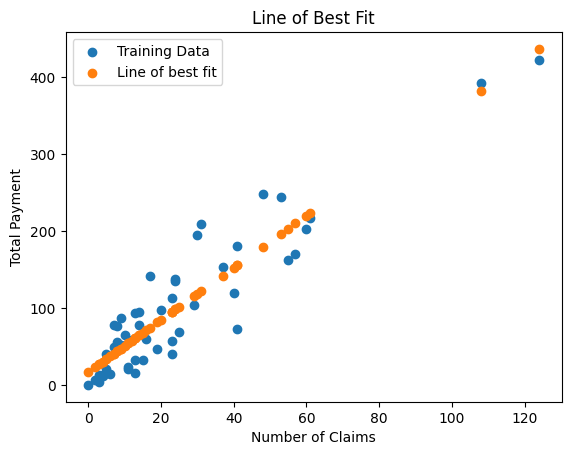

In [72]:
y_pred_train_2 = []
for x_sample in x_train:
    tmp = b0 + b1*x_sample
    y_pred_train_2.append(tmp)

fig,ax = plt.subplots(1,1)

ax.scatter(x_train,y_train)
ax.scatter(x_train,y_pred_train_2)
ax.legend(['Training Data','Line of best fit'])
ax.set_xlabel('Number of Claims')
ax.set_ylabel('Total Payment')
ax.set_title('Line of Best Fit')
plt.show()